In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [6]:
data = pd.read_csv('insurance - insurance.csv')
data.head()
# отнормаировать значения bmi, вывести график ошибок (проследить как график падал во время обучения сравнивать график тренеровочных )

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

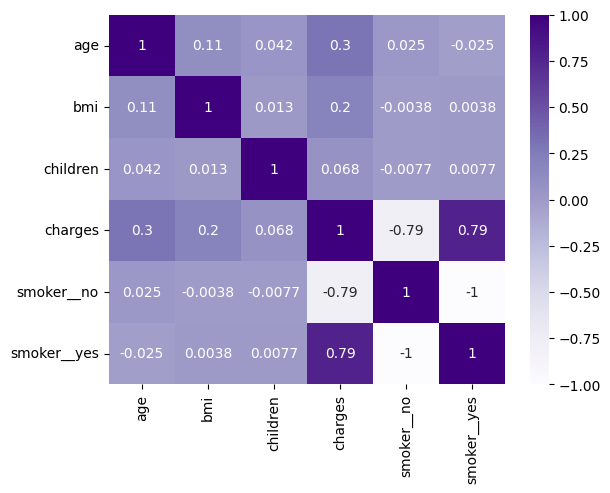

In [12]:
numeric_data = data.select_dtypes(include=['float64', 'int64']) # отбираются только числовые столбцы
categorical_data = pd.get_dummies(data['smoker'], prefix='smoker_') # создается дамми-переменная для столбца "smoker"

merged_data = pd.concat([numeric_data, categorical_data], axis=1) # объединение числовых столбцов с созданной дамми-переменной

corr = merged_data.corr() # рассчитывается матрица корреляций
sns.heatmap(corr, cmap='Purples', annot=True) # строится тепловая карта

# написать можедь линйной регресси используя chargers bmi 

In [19]:
# Class Norm  (make column transforms)
# def normalize(data):
#     min_bmi = min(bmi_column)
#     max_charges = max(charges_column)
#     normalized_data = []

#     for i in data[bmi_column]:
#         normalized = ( i- min_bmi) / (max_charges - min_bmi)
#         normalized_data.append(normalized)

#     return normalized_data
#cреднее по одной колонки, из каждого элемента множемтва вычесть среднее и разделить на среднее 
# data['bmi'].mean()


In [22]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(data):
    # Создание экземпляра класса MinMaxScaler
    scaler = MinMaxScaler()
    
    # Применение нормализации к данным
    normalized_data = scaler.fit_transform(data)
    
    return normalized_data

In [23]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
from sklearn.linear_model import LinearRegression

X = merged_data.drop('charges', axis=1) # независимые переменные
y = merged_data['charges'] # зависимая переменная

model = LinearRegression() # создание экземпляра модели линейной регрессии
model.fit(X, y) # обучение модели

coefficients = model.coef_
intercept = model.intercept_

predict_values = model.predict(X)

In [15]:
predict_values

array([25587.42524891,  3880.94594512,  7158.62006921, ...,
        4398.7459491 ,  1615.83647369, 36793.67069541])

In [16]:
mse = ((y - predict_values)**2)/y.shape[0]
print(mse)

0        56602.038854
1         3472.138838
2         5485.453994
3       249487.095087
4         1857.814945
            ...      
1333      1859.640438
1334       274.500550
1335      5730.101757
1336       114.909639
1337     43765.212547
Name: charges, Length: 1338, dtype: float64


In [17]:
fgfgf= data['bmi']
print(fgfgf)

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


In [18]:
# 1) матрица кореляции 
# 2) нормализация 
# 3) предcrfpsdfybz changers
# 4) mse
# 5) учиться 